# Medical Image Segmentation: Shape

Please first check if matplotlib, sklearn, glob, re, PIL, and scipy packages are installed. Shape analysis can be very useful in medical image segmentation, especially when working with organs that have well-defined shapes, for example, lung fields, vertebrae, etc. It can be used as it is or in combination with other segmentation methods. This exercise will train you to generate a shape model for a human organ using manually annotated reference samples.

The following code shows how to read chest X-rays, and landmarks that annotate each lung field. It also shows how to visualize the landmarks.

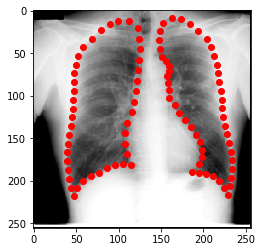

In [189]:
import matplotlib.pyplot as plt
#from IPython.display import clear_output
from scipy.spatial import procrustes
import sklearn
import glob
import os
from PIL import Image
import numpy as np
import re
%matplotlib inline 
folder = 'C:/Users/ibbul/Google Drive/Documents/University of Copenhagen/Lectures/General presentations/MIA Lectures/PracticalTasks/Data/'

def parseFile(fileName):
    objects = {}
    pattern = re.compile("[-+]?\d*\.\d+|\d+")
    points = []
    currentName = ''
    f = open(fileName, 'r')
    lines = f.readlines()
    for line in lines:
        if '  [Label=' in line:
            if currentName != '':
                objects[currentName] = points
            points = []
            currentName = line[9:-2]
        if line[0:4] == '  { ':
            splitted = re.findall(r"[-+]?\d*\.\d+|\d+", line)
            points.append([float(splitted[0]), float(splitted[1])])
    objects[currentName] = points
    return objects
        
def readBothLungFields(fileName, scaler = 4):
    objects = parseFile(fileName)
    lungs = np.concatenate((np.asarray(objects['right lung']),
                            np.asarray(objects['left lung']))) / scaler
    return lungs

def readCompleteDatabase(dataFolder):
    database = {}
    files = glob.glob(dataFolder + 'fold1/landmarks/*.pfs')
    for file in files:
        caseName = os.path.split(file)[1][:-4]
        im = Image.open(dataFolder + 'images/' + caseName + '.bmp')
        pIm = np.array(im)[:, :, 0]
        databaseElement = {}
        databaseElement['points'] = readBothLungFields(file)
        databaseElement['image'] = im
        database[caseName] = databaseElement
    return database

def main():
    database = readCompleteDatabase(folder + 'scratch/')
    plt.scatter(database['JPCLN001']['points'][:, 0], database['JPCLN001']['points'][:, 1], c = 'r')
    plt.imshow(database['JPCLN001']['image'], cmap='gray')
    
main()

# Procrustes

Exercise 1.1. Implement a Procrustes analysis to align lung field shapes. Visualize some of a pair of lung fields before and after Procrustes-based alignment.

Be sure to correctly implement normalization of the scale, translation, and rotation for the shape model before segmentation with active shape models. Do not forget to save scale factors in the database.

NOTE: you should implement the removal of translation, rotation, and scaling yourself without using any libraries except numpy.

In [1]:
# implement removal of translation

# implement removal of scaling

# implement removal of rotation

# apply procrustes

# visualize the results

# Principal component analysis

Exercise 1.2. Implement PCA for modeling the shape of lung fields. Generate illustrations of the mean lung field shape, lung field shape +-3 * sqrt(eigenvalue) for three first eigenval

Compute PCA for lung shape and generate different lung field variaitons

In [2]:
# implement PCA using any existing package

# visualize 3x3 table with image. The midcolumn should contain the mean lung shape. 
# The right column should define the combination of the mean shape 
#                  and -3 * sqrt(eigenvalue) eigenvector for the first three eigenvectors
# The right column should define the combination of the mean shape 
#                  and +3 * sqrt(eigenvalue) eigenvector for the first three eigenvectors